In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline
# pd.set_option('max_colwidth', 50)
# set this if you need to

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [4]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str, 'date': int})
businesses.head()
# dtype casts the column as a specific data type

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882.0,NaN,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024.0,10/10/2001,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114


In [5]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
inspections.head()

,business_id,Score,date,type
0,10,NaN,20140807,Reinspection/Followup
1,10,94.0,20140729,Routine - Unscheduled
2,10,NaN,20140124,Reinspection/Followup
3,10,92.0,20140114,Routine - Unscheduled
4,19,94.0,20141110,Routine - Unscheduled


In [6]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
violations.head()

,business_id,date,ViolationTypeID,risk_category,description
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,20140729,103129,Moderate Risk,Insufficient hot water or running water
4,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [7]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html

merged_businesses_inspections = pd.merge(businesses, inspections, on='business_id', how='outer')
restaurant_scores = pd.merge(merged_businesses_inspections, violations, on=['business_id', 'date'], how='outer')

restaurant_scores


,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,...,owner_address,owner_city,owner_state,owner_zip,Score,date,type,ViolationTypeID,risk_category,description
0,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,NaN,20140807.0,Reinspection/Followup,NaN,NaN,NaN
1,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,94.0,20140729.0,Routine - Unscheduled,103129.0,Moderate Risk,Insufficient hot water or running water
2,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,94.0,20140729.0,Routine - Unscheduled,103144.0,Low Risk,Unapproved or unmaintained equipment or utensils
3,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,NaN,20140124.0,Reinspection/Followup,NaN,NaN,NaN
4,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,92.0,20140114.0,Routine - Unscheduled,103154.0,Low Risk,Unclean or degraded floors walls or ceilings
5,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,92.0,20140114.0,Routine - Unscheduled,103119.0,Moderate Risk,Inadequate and inaccessible handwashing facili...
6,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,92.0,20140114.0,Routine - Unscheduled,103145.0,Low Risk,Improper storage of equipment utensils or linens
7,19.0,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,...,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109,94.0,20141110.0,Routine - Unscheduled,103145.0,Low Risk,Improper storage of equipment utensils or linens
8,19.0,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,...,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109,94.0,20141110.0,Routine - Unscheduled,103116.0,Moderate Risk,Inadequate food safety knowledge or lack of ce...
9,19.0,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,...,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109,94.0,20140214.0,Routine - Unscheduled,103156.0,Low Risk,Permit license or inspection report not posted


In [8]:
# 2 Which ten business have had the most inspections?

restaurant_scores.groupby(['business_id', 'name'])['date'].agg('count').sort_values(ascending=False).head(10)



business_id  name                        
10238.0      King of Thai Noodle House       69
75139.0      Hakka Restaurant                66
71385.0      Yama Sushi Restaurant           66
2945.0       New Sun Hong Kong Restaurant    62
77693.0      SH Dream Inc                    62
67154.0      RIVERSIDE SEAFOOD RESTAURANT    60
3151.0       New Asia Restaurant             59
64176.0      Dragon River Restaurant         59
63082.0      The Brick Yard                  58
489.0        Dol-Ho Restaurant               55
Name: date, dtype: int64

In [9]:
# 3 Group and count the inspections by type

restaurant_scores['type'].value_counts()



Routine - Unscheduled                42222
Reinspection/Followup                 6043
Complaint                             3155
New Ownership                         2665
New Construction                      1643
Non-inspection site visit             1008
Foodborne Illness Investigation        246
Complaint Reinspection/Followup        168
Structural Inspection                  142
Routine - Scheduled                    100
Administrative or Document Review        4
Special Event                            2
Multi-agency Investigation               2
Name: type, dtype: int64

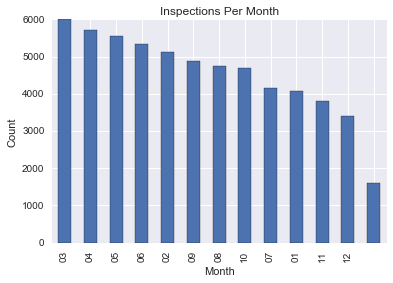

In [10]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap



restaurant_scores['month'] = restaurant_scores['date'].apply(lambda x:str(x)[4:6])

restaurant_scores['month'].value_counts().plot(kind='bar', title='Inspections Per Month')
plt.xlabel('Month')
plt.ylabel('Count')




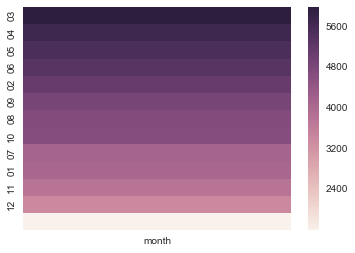

In [11]:
heatmap_table = pd.DataFrame(restaurant_scores['month'].value_counts())

sns.heatmap(heatmap_table)

In [12]:
# 5 Which zip code contains the most high risk violations?

restaurant_scores['owner_zip'][restaurant_scores['risk_category'] == 'High Risk'].value_counts().head(1)                                                            


94133    514
Name: owner_zip, dtype: int64

In [13]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?

restaurant_scores['risk_category'][restaurant_scores['type'] == 'New Ownership'].value_counts()

# Answer: More likely to be lower risk

Low Risk         553
Moderate Risk    419
High Risk        148
Name: risk_category, dtype: int64

In [14]:
# 7 Examining the descriptions, what is the most common violation?

restaurant_scores['description'].value_counts().head(1)



Unclean or degraded floors walls or ceilings    3757
Name: description, dtype: int64

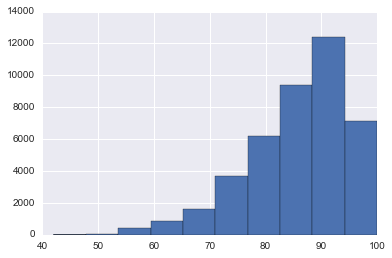

In [15]:
# 8 Create a hist of the scores with 10 bins

restaurant_scores['Score'].hist(bins=10)

In [16]:
# 9 Can you predict risk category based on the other features in this dataset?

restaurant_scores['description'].value_counts()

restaurant_scores['risk_category'][restaurant_scores['description'] == 'Unclean or degraded floors walls or ceilings'].value_counts()

# Description can probably predict risk category - for example, 'Unclean or degraded floors walls or ceilings' is always a low risk





Low Risk    3757
Name: risk_category, dtype: int64

In [17]:
# 10 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/


restaurant_scores['business_id'][restaurant_scores['risk_category'] == 'High Risk'].value_counts()

# business_id is 33446

location = restaurant_scores[['business_id','longitude', 'latitude', 'name']][restaurant_scores['business_id'] == 33446]

longitude = location.iloc[0]['longitude']
latitude = location.iloc[0]['latitude']

# My access token only has sandbox access. Please substitute for a live token for actual results.
access_token = "274700711.4be41e6.c3ad28e7656d45ff87ead1956625d0aa"

import requests

r = requests.get('https://api.instagram.com/v1/media/search?lat='+str(latitude)+'&lng='+str(longitude)+'&access_token='+str(access_token))

import json
 
instagram_data = json.loads(r.text)


for item in instagram_data['data']:
    print item['image']['standard_resolution']

# This returns list of url of images which can be opened in your browser
# Since images cannot be displayed in console output as per my research, I feel this should be sufficient.


In [18]:
############################
### A Little More Morbid ###
############################

In [19]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [20]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race

killings.rename(columns={'lawenforcementagency': 'agency', 'raceethnicity': 'race'}, inplace=True)

In [21]:
# 2. Show the count of missing values in each column

killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [22]:
# 3. replace each null value in the dataframe with the string "Unknown"

killings.fillna(value = 'Unknown', inplace = True)

killings.isnull().sum()


Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    0
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [23]:
# 4. How many killings were there so far in 2015?

killings['year'].value_counts()

2015    467
Name: year, dtype: int64

In [24]:
# 5. Of all killings, how many were male and how many female?

killings['gender'].value_counts()

Male      445
Female     22
Name: gender, dtype: int64

In [25]:
# 6. How many killings were of unarmed people?

killings['name'][killings['armed'] == 'No'].count()



102

In [26]:
# 7. What percentage of all killings were unarmed?

killings['name'][killings['armed'] == 'No'].count() / float(len(killings['name']))

0.21841541755888652

In [27]:
# 8. What are the 5 states with the most killings?

killings['state'].value_counts().head(5)

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

In [28]:
# 9. Show a value counts of deaths for each race

killings['race'].value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

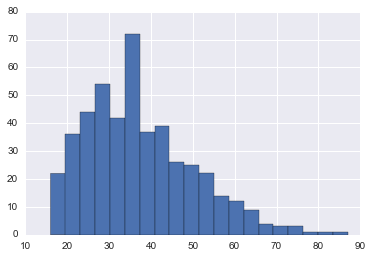

In [29]:
# 10. Display a histogram of ages of all killings

killings['age'].hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bbf9cd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ce01950>]], dtype=object)

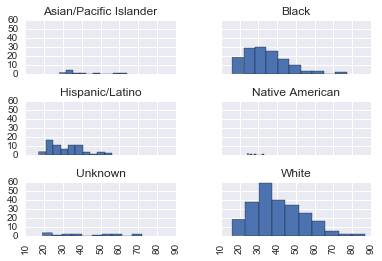

In [30]:
# 11. Show 6 histograms of ages by race

killings.age.hist(by=killings.race, sharex=True, sharey=True)

In [31]:
# 12. What is the average age of death by race?

killings.groupby('race').age.mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

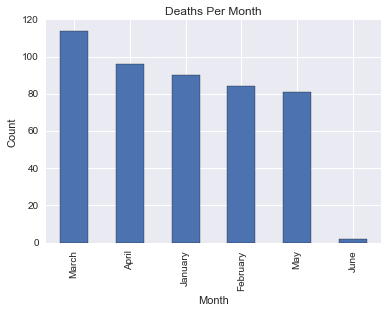

In [32]:
# 13. Show a bar chart with counts of deaths every month

killings['month'].value_counts().plot(kind='bar', title='Deaths Per Month')
plt.xlabel('Month')
plt.ylabel('Count')


In [33]:
###################
### Less Morbid ###
###################

In [34]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [35]:
# 1. Delete the columns (employed_full_time_year_round, major_code)

del majors['Employed_full_time_year_round']
del majors['Major_code']

majors.head(1)

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0


In [36]:
# 2. Show the cout of missing values in each column

majors.isnull().sum()

Unnamed: 0           0
Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

In [37]:
# 3. What are the top 10 highest paying majors?




top_10 = majors[['Major','Median']].sort_index(by='Median').tail(10)


top_10

/Users/cathysun/anaconda/envs/virtualenv/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,Major,Median
51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,85000
45,CHEMICAL ENGINEERING,86000
48,ELECTRICAL ENGINEERING,88000
97,MATHEMATICS AND COMPUTER SCIENCE,92000
56,MINING AND MINERAL ENGINEERING,92000
58,NUCLEAR ENGINEERING,95000
55,METALLURGICAL ENGINEERING,96000
57,NAVAL ARCHITECTURE AND MARINE ENGINEERING,97000
154,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,106000
59,PETROLEUM ENGINEERING,125000


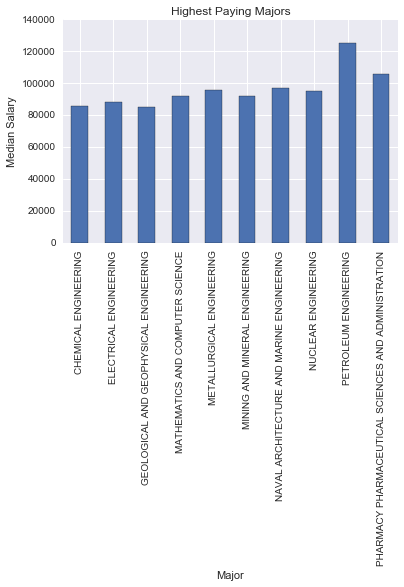

In [38]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!

top_10.groupby('Major').Median.mean().plot(kind='bar', title='Highest Paying Majors')
plt.xlabel('Major')
plt.ylabel('Median Salary')



In [39]:
# 5. What is the average median salary for each major category?

majors.groupby('Major_category').Median.mean()

Major_category
Agriculture & Natural Resources        55000.000000
Arts                                   43525.000000
Biology & Life Science                 50821.428571
Business                               60615.384615
Communications & Journalism            49500.000000
Computers & Mathematics                66272.727273
Education                              43831.250000
Engineering                            77758.620690
Health                                 56458.333333
Humanities & Liberal Arts              46080.000000
Industrial Arts & Consumer Services    52642.857143
Interdisciplinary                      43000.000000
Law & Public Policy                    52800.000000
Physical Sciences                      62400.000000
Psychology & Social Work               44555.555556
Social Science                         53222.222222
Name: Median, dtype: float64

In [40]:
# 6. Show only the top 5 paying major categories

majors.groupby('Major_category').Median.mean().sort_values().tail(5)

Major_category
Health                     56458.333333
Business                   60615.384615
Physical Sciences          62400.000000
Computers & Mathematics    66272.727273
Engineering                77758.620690
Name: Median, dtype: float64

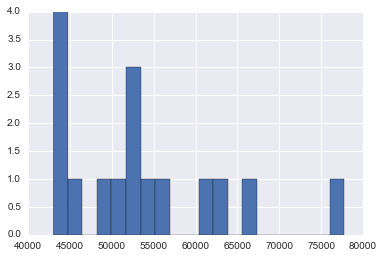

In [41]:
# 7. Plot a histogram of the distribution of median salaries

majors.groupby('Major_category').Median.mean().hist(bins=20)

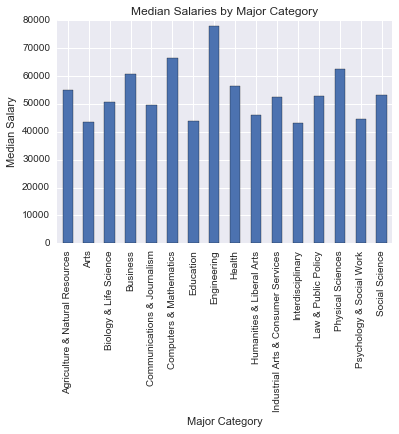

In [42]:
# 8. Plot a histogram of the distribution of median salaries by major category

majors.groupby('Major_category').Median.mean().plot(kind='bar', title='Median Salaries by Major Category')
plt.xlabel('Major Category')
plt.ylabel('Median Salary')

In [43]:
# 9. What are the top 10 most UNemployed majors?

majors[['Major','Unemployed']].sort_index(by='Unemployed').tail(10)




/Users/cathysun/anaconda/envs/virtualenv/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,Major,Unemployed
78,BIOLOGY,36757
25,GENERAL EDUCATION,38742
132,POLITICAL SCIENCE AND GOVERNMENT,40376
164,MARKETING AND MARKETING RESEARCH,51839
73,ENGLISH LANGUAGE AND LITERATURE,52248
13,COMMUNICATIONS,54390
159,ACCOUNTING,75379
114,PSYCHOLOGY,79066
158,GENERAL BUSINESS,85626
161,BUSINESS MANAGEMENT AND ADMINISTRATION,147261


In [44]:
# What are the unemployment rates?

majors[['Major','Unemployed','Unemployment_rate']].sort_index(by='Unemployed').tail(10)



/Users/cathysun/anaconda/envs/virtualenv/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,Major,Unemployed,Unemployment_rate
78,BIOLOGY,36757,0.059301
25,GENERAL EDUCATION,38742,0.043904
132,POLITICAL SCIENCE AND GOVERNMENT,40376,0.069374
164,MARKETING AND MARKETING RESEARCH,51839,0.055033
73,ENGLISH LANGUAGE AND LITERATURE,52248,0.068645
13,COMMUNICATIONS,54390,0.064360
159,ACCOUNTING,75379,0.053415
114,PSYCHOLOGY,79066,0.069667
158,GENERAL BUSINESS,85626,0.051378
161,BUSINESS MANAGEMENT AND ADMINISTRATION,147261,0.058865


In [45]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?

majors.groupby('Major_category').Unemployment_rate.mean().sort_values().tail(10)

Major_category
Physical Sciences                      0.054541
Industrial Arts & Consumer Services    0.058546
Computers & Mathematics                0.059437
Social Science                         0.065686
Law & Public Policy                    0.067854
Communications & Journalism            0.069125
Humanities & Liberal Arts              0.069429
Interdisciplinary                      0.077269
Psychology & Social Work               0.077867
Arts                                   0.087601
Name: Unemployment_rate, dtype: float64

In [46]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042

majors['sample_employment_rate'] = majors['Employed'].apply(lambda x: float(x)) / majors['Total']
                                                                

majors.head(5)

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.704225
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.806338
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.775173
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.783948
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.711738


In [47]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"

majors['sample_unemployment_rate'] = 1 - majors['sample_employment_rate']

majors.head(5)


,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate,sample_unemployment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.704225,0.295775
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.806338,0.193662
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.775173,0.224827
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.783948,0.216052
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.711738,0.288262
